[0.84622348 0.9439593  0.35144231 0.79367353 0.04324035 0.47779739
 0.00379724 0.30725428 0.8111211  0.33176063 0.8680528  0.69308655
 0.35379137 0.87266713 0.69922141 0.2548514  0.02596252 0.31203756
 0.64500448 0.06424399 0.3053717  0.23506421 0.1155966  0.4220742
 0.49285641 0.78363898 0.7801639  0.13474588 0.99344029 0.66802583
 0.18140587 0.13018248 0.67402341 0.5535651  0.08025384 0.37105465
 0.77661645 0.35981793 0.52570149 0.27381775 0.92450757 0.71809305
 0.38847968 0.42437736 0.51147249 0.53064542 0.70302976 0.46565054
 0.70886673 0.67444666 0.17852262 0.17710008 0.44534351 0.18390596
 0.98602926 0.28422011 0.98614263 0.223678   0.23479724 0.93754321
 0.53662148 0.76746712 0.03392853 0.94810674 0.08824844 0.86175707
 0.37645414 0.94365826 0.74058626 0.44325774 0.5939642  0.88620203
 0.94991109 0.04204845 0.2631489  0.05945314 0.46302625 0.10565331
 0.0271151  0.6835423  0.87172176 0.13064486 0.46694399 0.09178826
 0.05978896 0.73995451 0.71735785 0.32291953 0.31593366 0.25788

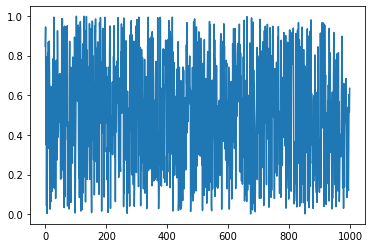

In [23]:
#Dataset 1 - Plot
#import modules
import numpy as np
import matplotlib.pyplot as plt
#Relative Path to the Dataset
fname = "data/dset1.txt"
#load data into variable that will store an numpy array of the data
data = np.loadtxt(fname)
#Print the data set
print(data)
#create and show graphs
plt.plot(data)
plt.show()

In [21]:
#Dataset 1- Eyeball Mean and Standard Deviation
#By eye, its is hard to estimate an exact value of mean and standard deviation due to the fluctuations of the plotted data. However, based on the graph created, I would have to say that mean is close to 0.5 as the distrubtion seems to have a relatively similar number of maximums and minimums with a lot of points generally around the value of 0.5. The standard deviation is also hard to estimate by eye. Using the central limit theorem (since we have a large data set) and what we know about normality, the addition and subtraction of the standard deviation will encapsulate about 68% of the data of the entire data set. As a result, I estimate the standard deviation to be around 0.23.

In [37]:
#Dataset 1- std and mean for eyeball comparison
import statistics 
# mean
print(statistics.mean(data))
#standard deviation 
print(statistics.stdev(data))
# Comparing the computed standard deviation and mean produced with those that were estimated through eyeballing. The numbers are actually relatively similar to what was calculated indicating that my reasoning to the eyeball estimates based off the graph were relatively effective.   

0.5008547564015497
0.28294102378178476


(1000,)


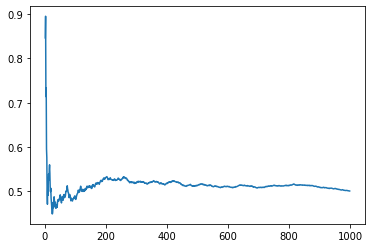

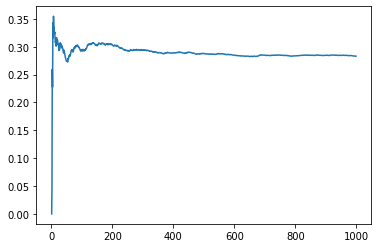

In [45]:
#Dataset 1 - endcutoff vs std | endcutoff vs mean
num_rows= data.shape
print (num_rows,)
#Conclusion: There are 1000 data points 
mean_data = []
standard_dev_data = []
index = []
for i in range(1000):
    cutoff_data = np.loadtxt(fname, max_rows=i)
    mean = np.mean(cutoff_data)
    standard_dev = np.std(cutoff_data)
    endcutoff = i
    mean_data.append(mean)
    standard_dev_data.append(standard_dev)
    index.append(endcutoff)

plt.plot(index, mean_data)
plt.show()
plt.plot(index, standard_dev_data)

#Based on the graphs, the first 100 points will give a mean of approximately 0.48 and standard deviation of 0.27. As the cutoff of the number of points decrease it becomes apparent that the mean and standard deviation of the data set begins to approach somewhat of a limit with more and more points. 


[-7.1        -6.01170774 -6.17718866 -5.96187408 -5.96342937 -6.13643772
 -6.18218152 -6.1825044  -6.4864899  -6.4864899  -6.50722587 -7.12655968
 -6.77473622 -6.56289632 -6.29299611 -6.64101043 -6.64101043 -7.15652374
 -6.99623872 -6.99623872 -6.78022151 -7.1162577  -7.17048788 -7.09706086
 -7.38469787 -7.56867039 -7.46385686 -7.63513807 -7.67271886 -7.55406129
 -8.10904592 -8.25421105 -7.77220362 -7.64360949 -7.64691632 -7.79291197
 -8.13289956 -8.37753235 -8.09340847 -8.26827223 -7.91886229 -7.13305385
 -7.21421886 -7.46400973 -8.03926019 -8.14112643 -7.73698872 -7.70497563
 -7.67750415 -8.29062095 -8.1798497  -8.33386979 -8.02869449 -8.00963327
 -7.61275432 -7.55395068 -7.46886646 -7.12595048 -6.8383285  -7.22478901
 -6.72351847 -6.80004198 -7.14350622 -7.21113889 -7.17701422 -7.05705665
 -6.33908172 -6.33908172 -6.42206533 -6.3655749  -6.3655749  -6.16751326
 -6.2662732  -6.944699   -7.09360067 -7.2116947  -7.27844373 -7.12715198
 -6.98223749 -6.90056762 -7.02570229 -7.58462456 -7

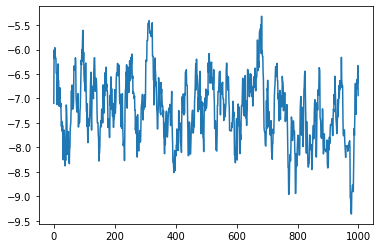

In [17]:
#Dataset 2 - Plot
fname2 = "data/dset2.txt"
data2 = np.loadtxt(fname2)
print(data2)
plt.plot(data2)
plt.show()

In [71]:
#Dataset 2 - Find autocorrelation
#without autocorrelation
import math 
def my_std(a):
    return (statistics.stdev(a))
    
def c_func(a):
    N = len(a)
    mean = np.mean(a)
    std = my_std(a)
    c_sum = 0
    for i in range(0,N-1):
        c_sum += (a[i]-mean)*(a[i+1]-mean)
    return (1/np.square(std))*(1/(N-1))* c_sum
def my_actime(a): 
    t_cutoff = 0
    for i in range (1,len(a)):
        if c_func(a) <= 0:
            t_cutoff = i
            break
    k_sum = 0
    for i in range(1, t_cutoff):
        k_sum += c_func(a,i)
    return 1+2*k_sum
    
print(my_actime(data2))

#autocorrelation
import numpy as np
import statistics
def my_std(a):
    return (statistics.stdev(a))

def c_func(a,t):
    N = len(a)
    mean = np.mean(a)
    std = my_std(a)
    c_sum = 0
    for i in range(0,N-t):
        c_sum += (a[i]-mean)*(a[i+t]-mean)
    return (1/np.square(std))*(1/(N-t))* c_sum
def my_actime(a): 
    t_cutoff = 0
    for i in range (1,len(a)):
        if c_func(a,i) <= 0:
            t_cutoff = i
            break
    k_sum = 0
    for i in range(1, t_cutoff):
        k_sum += c_func(a,i)
    return 1+2*k_sum

print(my_actime(data2))

1
17.530834318271747


[-7.4044342  -7.4044342  -7.4044342  -7.4044342  -7.4044342  -7.03393133
 -6.73901523 -6.79591592 -6.24809267 -6.24809267 -6.24809267 -6.24809267
 -6.0604073  -6.0604073  -5.50885861 -4.74013603 -4.13390427 -4.03638482
 -3.92018794 -3.80623243 -3.6986367  -3.6986367  -2.83111177 -2.7767132
 -2.18208523 -2.09769372 -1.60636975 -1.5299752  -1.5299752  -1.42956302
 -0.90269972 -0.90269972 -0.90269972 -1.01647139 -0.64882524 -0.64882524
 -0.22953973  0.34673727  0.14324239  0.46526501  0.46526501  0.10239687
  0.74029015  0.74029015  0.74850946  0.87998321  1.08953872  0.84138414
  1.11708132  0.43219332  0.5021728   0.48812948  0.5548795   0.3470652
  1.20810499  1.27124456  1.37735812  2.02726043  2.02726043  2.2811497
  1.90509121  2.22123081  2.22123081  2.22123081  1.63438094  1.63438094
  1.67029957  2.03982462  2.04978799  2.22901795  2.35499763  2.18825788
  2.08832596  2.08832596  2.40630013  1.93597891  1.16678001  1.41440412
  1.02939636  1.02939636  1.04917969  1.05425991  0.82

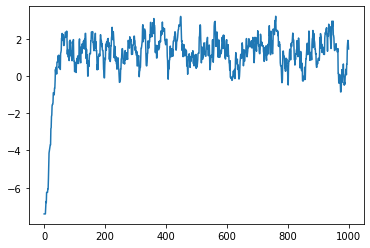

In [18]:
#Dataset 3 - Plot
fname3 = "data/dset3.txt"
data3 = np.loadtxt(fname3)
print(data3)
plt.plot(data3)
plt.show()

In [70]:
#Estimate mean and standard error w/o cutoff 
print(statistics.mean(data3))
import numpy as np
import statistics
import math

def my_std(a):
    return (statistics.stdev(a))
    
def c_func(a,t):
    N = len(a)
    mean = np.mean(a)
    std = my_std(a)
    c_sum = 0
    for i in range(0,N-t):
        c_sum += (a[i]-mean)*(a[i+t]-mean)
    return (1/np.square(std))*(1/(N-t))* c_sum
def my_actime(a): 
    t_cutoff = 0
    for i in range (1,len(a)):
        if c_func(a,i) <= 0:
            t_cutoff = i
            break
    k_sum = 0
    for i in range(1, t_cutoff):
        k_sum += c_func(a,i)
    return 1+2*k_sum

def my_stderr(a):
    
    std = my_std(a)
    N = len(a)
    autocorr = my_actime(a)
    standard_error = std / math.sqrt(N/autocorr)
    return standard_error
print(my_stderr(data3))
#

-0.19015264060221468
0.1652876890324818


[ 0.29605853  0.29605853  0.29605853 ... -6.18623306 -5.90088597
 -3.03775394]


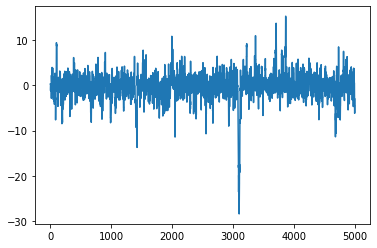

In [20]:
#Dataset 4 - Plot
fname4 = "data/dset4.txt"
data4 = np.loadtxt(fname4)
print(data4)
plt.plot(data4)
plt.show()

In [69]:
# PART2 - Central Limit Theorem 

A = [1.12, 1.52, 1.33, 1.09, 1.20, 1.26]
B = [1.44, 1.34, 1.19, 1.13, 1.56, 1.45]

#Mean of A
print(statistics.mean(A))
#Variance of A 
print(statistics.stdev(A))
#Standard Error of A
import math 
def my_std(a):
    return (statistics.stdev(a))
    
def c_func(a):
    N = len(a)
    mean = np.mean(a)
    std = my_std(a)
    c_sum = 0
    for i in range(0,N-1):
        c_sum += (a[i]-mean)*(a[i+1]-mean)
    return (1/np.square(std))*(1/(N-1))* c_sum
def my_actime(a): 
    t_cutoff = 0
    for i in range (1,len(a)):
        if c_func(a) <= 0:
            t_cutoff = i
            break
    k_sum = 0
    for i in range(1, t_cutoff):
        k_sum += c_func(a,i)
    return 1+2*k_sum

def my_stderr(a):
    
    std = my_std(a)
    N = len(a)
    autocorr = my_actime(a)
    standard_error = std / math.sqrt(N/autocorr)
    return standard_error
print(my_stderr(A))


#Mean of B
print(statistics.mean(B))
#Variance of B 
print(statistics.stdev(B))
#Standard Error of B
print(my_stderr(B))

#estimate of the difference
C = abs(statistics.mean(B) - statistics.mean(A))
print(C)
#estimate of the error of the difference
D = math.sqrt((my_stderr(A)**2) + (my_stderr(B)**2))
print(D)
print(C/D)
#The t-statistic ---> 1.0550190358247307
#Normal Probability is 71% meaning tail ends are the wanted 29%


1.2533333333333334
0.15769168230019825
0.06437735971942656
1.3516666666666666
0.16509593170840606
0.06740013188249545
0.09833333333333316
0.09320526928356693
1.0550190358247307
